## ***Классификаторы 2, 3***

# ***Лабораторная работа 3***

# ***Чесноков А.А.***

# ***Вариант 23***

## ***Набор данных 4***

## ***2 - K ближайших соседей (задаётся радиус для выбора ближайших объектов***

## ***3 - Линейный классификатор (персептрон)***

## ***1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).***

In [1]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

import scipy.stats as stats
import sklearn as skl
import warnings

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn.linear_model import Perceptron
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn import datasets

In [27]:
iris = pd.read_csv('iris.csv')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


### ***sepal.length - Длина чашелистика***

### ***sepal.width - Ширина чашелистика***

### ***petal.length - Длина лепестка***

### ***petal.width - Ширина лепестка***

### ***variety - Классы растений Ирис***

## ***2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции.***

In [3]:
print('До удаление дубликатов: %d' % len(iris))
iris.drop_duplicates(keep="first", inplace=True)
print('После удаление дубликатов: %d' % len(iris))

До удаление дубликатов: 150
После удаление дубликатов: 149


## ***3.	Оцените сбалансированность данных по классам (постройте гистограмму).***

<AxesSubplot:xlabel='class', ylabel='count'>

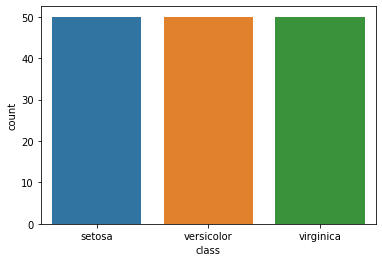

In [29]:
sns.barplot(data=pd.DataFrame({
'count': [
len(iris[iris['variety'] == 'Setosa']),
len(iris[iris['variety'] == 'Versicolor']),
len(iris[iris['variety'] == 'Virginica']),
],
'class': [
'setosa',
'versicolor',
'virginica',
],
}), y='count', x='class')

In [30]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## ***4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);***

numerical:  ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
categor:  ['variety']


<AxesSubplot:>

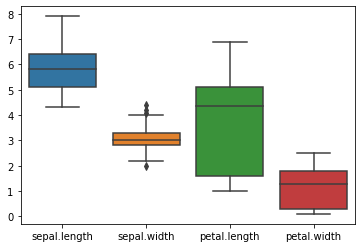

In [31]:
numer = [i for i in iris.columns if iris[i].dtype.name != 'object']
categor = [i for i in iris.columns if iris[i].dtype.name == 'object' ]
print('numerical: ', numer)
print('categor: ', categor)

sns.boxplot(data = iris[numer])

,sepal.length,sepal.width,petal.length,petal.width,variety
0,0.222222,0.625000,0.067797,0.041667,Setosa
1,0.166667,0.416667,0.067797,0.041667,Setosa
2,0.111111,0.500000,0.050847,0.041667,Setosa
3,0.083333,0.458333,0.084746,0.041667,Setosa
4,0.194444,0.666667,0.067797,0.041667,Setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,Virginica
146,0.555556,0.208333,0.677966,0.750000,Virginica
147,0.611111,0.416667,0.711864,0.791667,Virginica
148,0.527778,0.583333,0.745763,0.916667,Virginica


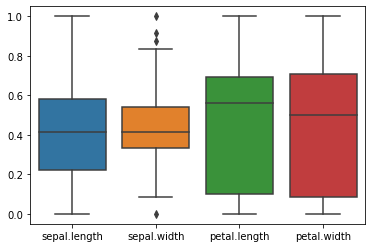

In [7]:
scaler = preprocessing.MinMaxScaler()

iris[numer] = scaler.fit_transform(iris[numer].values.astype(float))
sns.boxplot(data=iris[numer])

iris

## ***5 - Выполните замену категориальных признаков; выберите и обоснуйте способ замены;***

In [37]:
def dummy(data, feature):
    for i in data[feature].unique():
        data[feature + ' = ' +  str(i)] = (data[feature] == i).astype(float)
        
dummy(iris, 'variety')
iris.drop(['variety'], axis='columns', inplace=True)
iris

,sepal.length,sepal.width,petal.length,petal.width,variety = Setosa,variety = Versicolor,variety = Virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,0.0,0.0,1.0


## ***6 - Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);***

<AxesSubplot:>

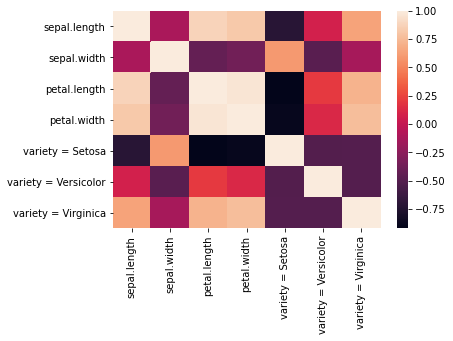

In [9]:
correl = iris.corr()
sns.heatmap(correl)

### ***Корреляция равномерная***

## ***7 - Заполните пропущенные значения в данных;***

In [10]:
iris.count()

sepal.length            149
sepal.width             149
petal.length            149
petal.width             149
variety = Setosa        149
variety = Versicolor    149
variety = Virginica     149
dtype: int64

### ***Пропусков нет***

## ***8 - Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку ***

In [38]:
X, y = iris.drop('variety = Versicolor', axis=1), iris['variety = Versicolor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

### ***2 - классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);***

In [12]:
rnc = RadiusNeighborsClassifier()
params = {'radius': [2, 3, 4],
          'weights': ['uniform', 'distance']}

In [13]:
rnc_grid = GridSearchCV(rnc, params)
rnc_grid.fit(X_train, y_train)

GridSearchCV(estimator=RadiusNeighborsClassifier(),
             param_grid={'radius': [2, 3, 4],
                         'weights': ['uniform', 'distance']})

In [39]:
r = rnc_grid.best_estimator_.radius
rnc = RadiusNeighborsClassifier(radius=r)
rnc.fit(X_train, y_train)
y_score = rnc.predict(X_test)
print('Точность классификатора: %.7f'%(accuracy_score(y_test, y_score)))
print('Best: %.7f'%(rnc_grid.best_score_))

Точность классификатора: 0.8666667
Best: 1.0000000


### ***3 – линейный классификатор (персептрон);***

In [40]:
ppn = Perceptron()
ppn_params = {'alpha': np.linspace(0, 1, 20),
              'max_iter': [x for x in range(1, 50)]}
print(ppn_params)

{'alpha': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]), 'max_iter': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}


In [124]:
ppn_grid = GridSearchCV(estimator=ppn, 
                        param_grid=ppn_params) 
ppn_grid.fit(X_train, y_train)


alpha = ppn_grid.best_estimator_.alpha
max_iter = ppn_grid.best_estimator_.max_iter

ppn = Perceptron(alpha = alpha, 
                 max_iter = max_iter)
ppn.fit(X_train, y_train)
y_score = ppn.predict(X_test)

print('Accuracy of ppn: %.7f'%(accuracy_score(y_test, y_score)))
print('Best: %.7f'%(ppn_grid.best_score_))

D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: Convergence

D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: Convergence

D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: Convergence

D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: Convergence

D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: Convergence

D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: Convergence

D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: Convergence

D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: Convergence

D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: Convergence

D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: Convergence

D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: Convergence

D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: Convergence

D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: Convergence

D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: Convergence

D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: Convergence

D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: Convergence

D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: Convergence

D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: Convergence

D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: Convergence

D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: Convergence

Accuracy of ppn: 1.0000000
Best: 1.0000000


D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
D:\pyton\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
